In [1]:
import sys
import time

# Maths things
import numpy as np

# Plotting
import matplotlib.pyplot as plt

# Algorithm
from sklearn.kernel_ridge import KernelRidge
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression

from functools import partial
from sklearn import preprocessing

In [2]:
data = np.load('regression_data.npy')
target = np.loadtxt('target_values.txt')

In [3]:
error = mean_absolute_error

In [4]:
X_ltrain, X_test, Y_ltrain, Y_test = train_test_split(data, target, test_size = 100, random_state = 7)

In [5]:
from sklearn import preprocessing
X_ltrain = preprocessing.normalize(X_ltrain);
X_test =  preprocessing.normalize(X_test);

In [6]:
X_train, X_valid, Y_train, Y_valid = train_test_split(X_ltrain, Y_ltrain, test_size = 100, random_state = 17)

In [7]:
X_train.shape

(554, 27827)

# Feature Selection

## Importance

In [8]:
selector = SelectFromModel(estimator=LinearRegression()).fit(X_train, Y_train)
selector.estimator_.coef_

selector.threshold_
selector.get_support()

selector.transform(X_train);
X_train_redu, X_test_redu = (selector.transform(X_train),selector.transform(X_valid))

In [9]:
%%time
numbers_train = np.arange(54,655,50)
losses_lr = np.zeros((len(numbers_train)))
for i,n in enumerate(numbers_train):
    Xt_train = X_train[:n]
    Yt_train = Y_train[:n]
    lr = LinearRegression()
    lr.fit(Xt_train,Yt_train)
    Y_pred = lr.predict(X_valid)
    loss = error(Y_valid, Y_pred)
    losses_lr[i] = loss
    #print(i)
print('*Linear regression with original data')

*Linear regression with original data
CPU times: user 20.2 s, sys: 352 ms, total: 20.6 s
Wall time: 5.15 s


# Retrain and Datat Processing

In [10]:

T_ltrain = selector.transform(X_ltrain)
T_train  = selector.transform(X_train)
T_valid  = selector.transform(X_valid)
T_test   = selector.transform(X_test)

# Try different regression models

## Linear Regression

### No need for optimization

### Learning Curve

In [11]:
lr = LinearRegression()
numbers_train = np.arange(54,655,50)
losses_lr = np.zeros((len(numbers_train)))

In [12]:
%%time
for i,n in enumerate(numbers_train):
    Tt_train = T_ltrain[:n]
    Yt_train = Y_ltrain[:n]
    lr.fit(Tt_train,Yt_train)
    Y_pred = lr.predict(T_test)
    loss = error(Y_test, Y_pred)
    losses_lr[i] = loss
    print(i)

0
1
2
3
4
5
6
7
8
9
10
11
12
CPU times: user 4.64 s, sys: 100 ms, total: 4.74 s
Wall time: 1.19 s


In [13]:
optimal_index_loss_lr = np.unravel_index(losses_lr.argmin(), losses_lr.shape)
optimal_n_train_lr = numbers_train[optimal_index_loss_lr]
min_loss_lr = losses_lr[optimal_index_loss_lr]
print("Minimum loss of LR with importance is {} when number of train is {}  ".format(min_loss_lr,optimal_n_train_lr))

Minimum loss of LR with importance is 0.45637951112862607 when number of train is 554  


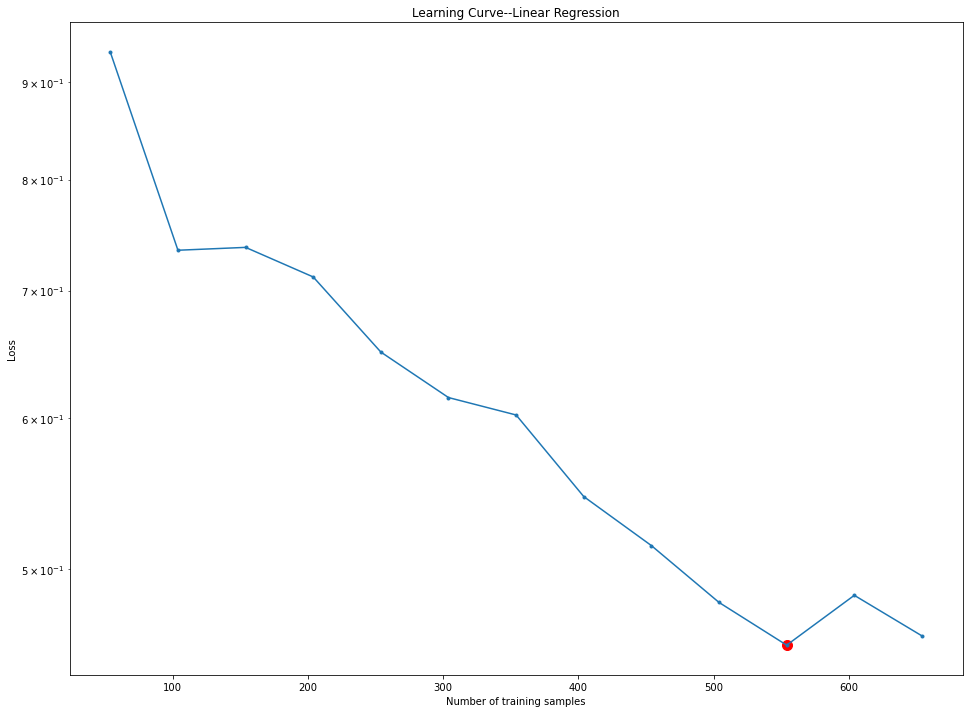

In [35]:
plt.figure(figsize=(16, 12))
plt.plot(numbers_train,losses_lr,'.-')
plt.scatter(optimal_n_train_lr, min_loss_lr, s = 100,marker='o', color='r')
plt.xlabel('Number of training samples')
plt.yscale('log')
plt.ylabel('Loss')
#plt.legend()
plt.title('Learning Curve--'+'Linear Regression')
plt.show()

## Ridge Regression

### Optimization

#### Optimization of alpha

In [15]:
%%time
alphas =  np.logspace(-10, 1, 23)
losses_rr_alpha = np.zeros((len(alphas)))
for i,alpha in enumerate(alphas):
    rr = Ridge(alpha = alpha)
    rr.fit(T_train, Y_train)
    Y_pred = rr.predict(T_valid)
    loss = error(Y_valid, Y_pred)
    losses_rr_alpha[i] = loss
    print(alpha)

1e-10
3.1622776601683795e-10
1e-09
3.1622776601683795e-09
1e-08
3.162277660168379e-08
1e-07
3.162277660168379e-07
1e-06
3.162277660168379e-06
1e-05
3.1622776601683795e-05
0.0001
0.00031622776601683794
0.001
0.0031622776601683794
0.01
0.03162277660168379
0.1
0.31622776601683794
1.0
3.1622776601683795
10.0
CPU times: user 2.66 s, sys: 20.1 ms, total: 2.68 s
Wall time: 681 ms


In [16]:
optimal_index_alpha_rr = np.unravel_index(losses_rr_alpha.argmin(), losses_rr_alpha.shape)
optimal_alpha_rr = alphas[optimal_index_alpha_rr]
print("Optimal alpha for RR with importance is {} ".format(optimal_alpha_rr))

Optimal alpha for RR with importance is 3.1622776601683795e-05 


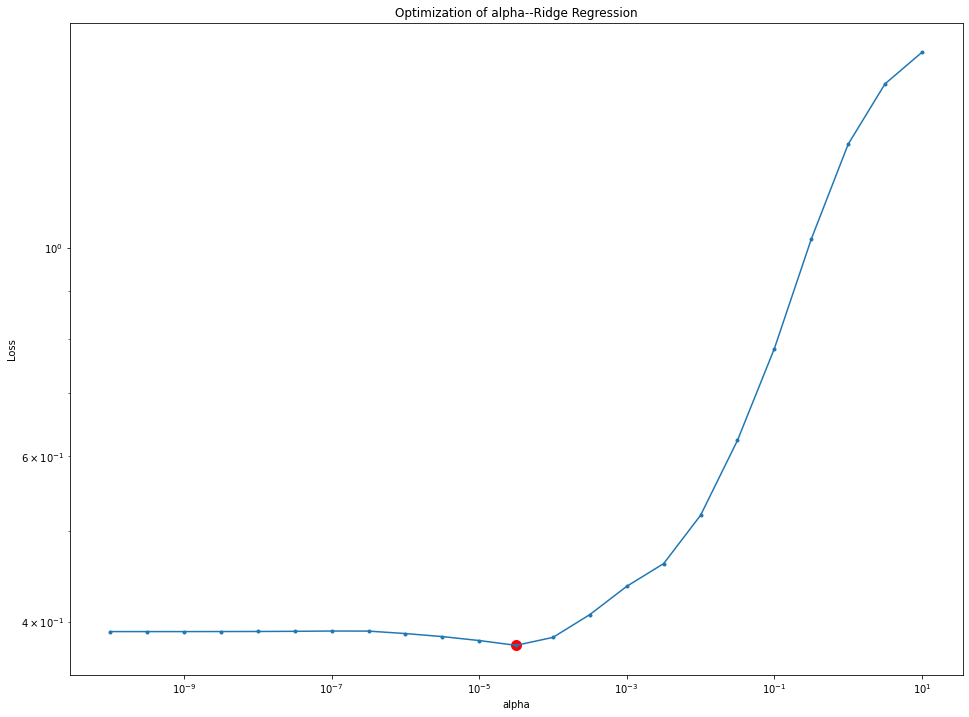

In [36]:
plt.figure(figsize=(16, 12))
plt.plot(alphas,losses_rr_alpha,'.-')
plt.scatter(optimal_alpha_rr, losses_rr_alpha[optimal_index_alpha_rr], s = 100,marker='o', color='r')
plt.xlabel('alpha')
plt.yscale('log')
plt.xscale('log')
plt.ylabel('Loss')
#plt.legend()
plt.title('Optimization of alpha--'+'Ridge Regression')
plt.show()

### Learning Curve

In [18]:
best_rr = Ridge(alpha = optimal_alpha_rr)
numbers_train = np.arange(54,655,50)
losses_rr = np.zeros((len(numbers_train)))

In [19]:
%%time
for i,n in enumerate(numbers_train):
    Tt_train = T_ltrain[:n]
    Yt_train = Y_ltrain[:n]
    best_rr.fit(Tt_train,Yt_train)
    Y_pred = best_rr.predict(T_test)
    loss = error(Y_test, Y_pred)
    losses_rr[i] = loss
    print(i)

0
1
2
3
4
5
6
7
8
9
10
11
12
CPU times: user 1.23 s, sys: 24 ms, total: 1.25 s
Wall time: 313 ms


In [20]:
losses_rr

array([0.93900763, 0.72304189, 0.7223198 , 0.69635565, 0.63456157,
       0.608434  , 0.59701607, 0.5518421 , 0.52702317, 0.47421818,
       0.44782905, 0.45555958, 0.42528973])

In [21]:
optimal_index_loss_rr = np.unravel_index(losses_rr.argmin(), losses_rr.shape)
optimal_n_train_rr = numbers_train[optimal_index_loss_rr]
min_loss_rr = losses_rr[optimal_index_loss_rr]
print("Minimum loss of RR with Pimportance is {} when number of train is {}  ".format(min_loss_rr,optimal_n_train_rr))

Minimum loss of RR with Pimportance is 0.4252897340954999 when number of train is 654  


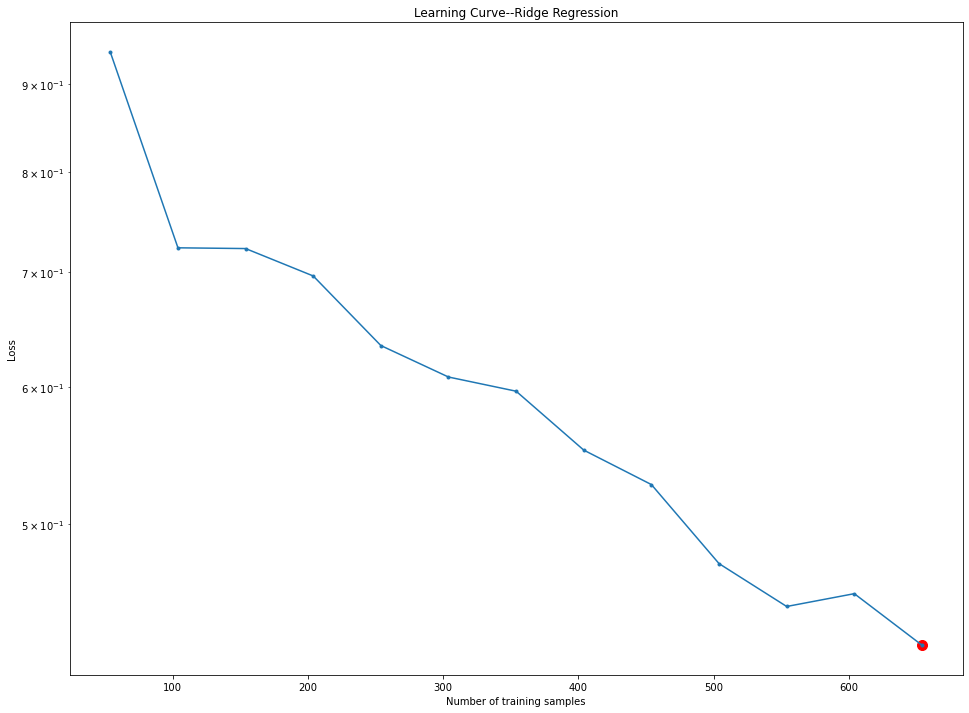

In [37]:
plt.figure(figsize=(16, 12))
plt.plot(numbers_train,losses_rr,'.-')
plt.scatter(optimal_n_train_rr, min_loss_rr, s = 100,marker='o', color='r')
plt.xlabel('Number of training samples')
plt.yscale('log')
plt.ylabel('Loss')
#plt.legend()
plt.title('Learning Curve--'+'Ridge Regression')
plt.show()

## Kernel Ridge Regression

### Optimization

#### Optimization of gamma

In [23]:
%%time
gammas =  np.logspace(-10, 1, 23)
losses_krr_gamma = np.zeros((len(gammas)))
kernel_params = {"kernel": "rbf", "gamma": 1.0}
for i,gamma in enumerate(gammas):
    kernel_params["gamma"] = gamma
    krr = KernelRidge(alpha = 1e-6, **kernel_params)
    krr.fit(T_train, Y_train)
    Y_pred = krr.predict(T_valid)
    loss = error(Y_valid, Y_pred)
    losses_krr_gamma[i] = loss
    print(gamma)

1e-10
3.1622776601683795e-10
1e-09
3.1622776601683795e-09
1e-08
3.162277660168379e-08
1e-07
3.162277660168379e-07
1e-06
3.162277660168379e-06
1e-05
3.1622776601683795e-05
0.0001
0.00031622776601683794
0.001
0.0031622776601683794
0.01
0.03162277660168379
0.1
0.31622776601683794
1.0
3.1622776601683795
10.0
CPU times: user 5.14 s, sys: 52.1 ms, total: 5.2 s
Wall time: 1.3 s


In [24]:
optimal_index_gamma_krr = np.unravel_index(losses_krr_gamma.argmin(), losses_krr_gamma.shape)
optimal_gamma_krr = gammas[optimal_index_gamma_krr]
print("Optimal gamma for KRR with importance is {} ".format(optimal_gamma_krr))

Optimal gamma for KRR with importance is 10.0 


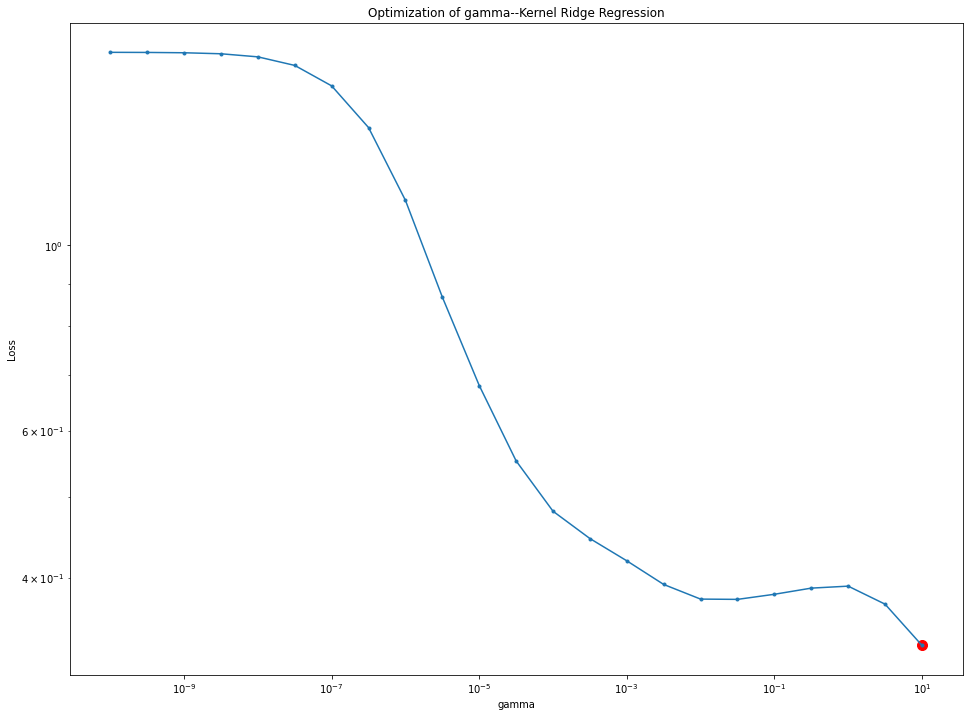

In [38]:
plt.figure(figsize=(16, 12))
plt.plot(gammas,losses_krr_gamma,'.-')
plt.scatter(optimal_gamma_krr, losses_krr_gamma[optimal_index_gamma_krr], s = 100,marker='o', color='r')
plt.xlabel('gamma')
plt.yscale('log')
plt.xscale('log')
plt.ylabel('Loss')
#plt.legend()
plt.title('Optimization of gamma--'+'Kernel Ridge Regression')
plt.show()

#### Optimization of alpha

In [26]:
%%time
alphas =  np.logspace(-10, 1, 23)
losses_krr_alpha = np.zeros((len(alphas)))
kernel_params = {"kernel": "rbf", "gamma": optimal_gamma_krr}
for i,alpha in enumerate(alphas):
    krr = KernelRidge(alpha = alpha, **kernel_params)
    krr.fit(T_train, Y_train)
    Y_pred = krr.predict(T_valid)
    loss = error(Y_valid, Y_pred)
    losses_krr_alpha[i] = loss
    print(alpha)

1e-10
3.1622776601683795e-10
1e-09
3.1622776601683795e-09
1e-08
3.162277660168379e-08
1e-07
3.162277660168379e-07
1e-06
3.162277660168379e-06
1e-05
3.1622776601683795e-05
0.0001
0.00031622776601683794
0.001
0.0031622776601683794
0.01
0.03162277660168379
0.1
0.31622776601683794
1.0
3.1622776601683795
10.0
CPU times: user 4.55 s, sys: 31.9 ms, total: 4.58 s
Wall time: 1.15 s


In [27]:
optimal_index_alpha_krr = np.unravel_index(losses_krr_alpha.argmin(), losses_krr_alpha.shape)
optimal_alpha_krr = alphas[optimal_index_alpha_krr]
print("Optimal alpha for KRR with importance is {} ".format(optimal_alpha_krr))

Optimal alpha for KRR with importance is 3.162277660168379e-06 


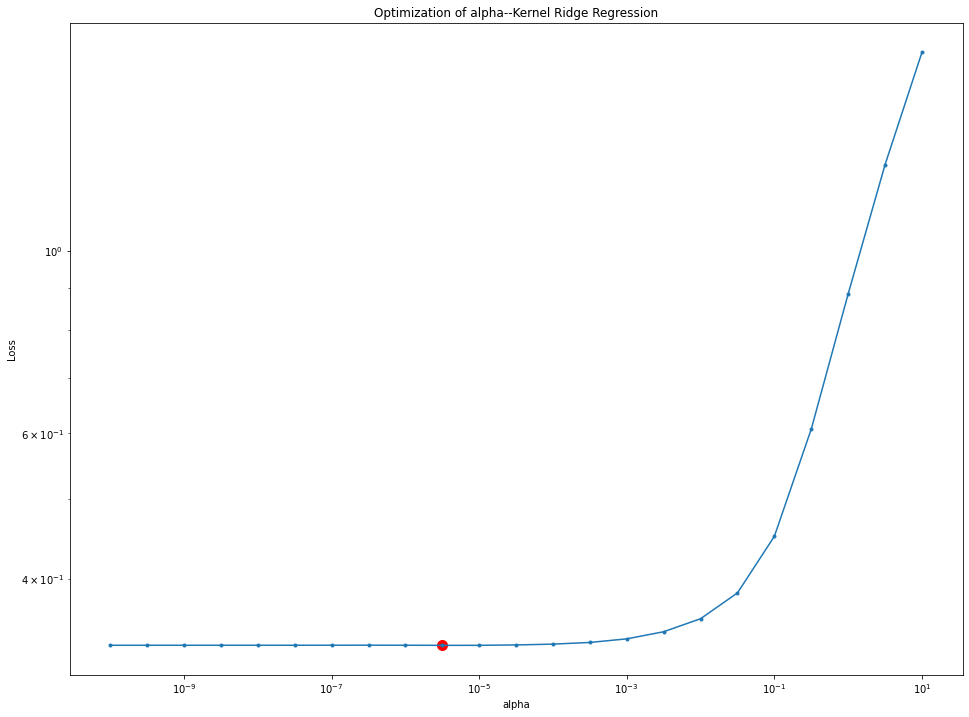

In [39]:
plt.figure(figsize=(16, 12))
plt.plot(alphas,losses_krr_alpha,'.-')
plt.scatter(optimal_alpha_krr, losses_krr_alpha[optimal_index_alpha_krr], s = 100,marker='o', color='r')
plt.xlabel('alpha')
plt.yscale('log')
plt.xscale('log')
plt.ylabel('Loss')
#plt.legend()
plt.title('Optimization of alpha--'+'Kernel Ridge Regression')
plt.show()

### Learning Curve

In [29]:
best_krr = KernelRidge(alpha = optimal_alpha_krr, **kernel_params)
numbers_train = np.arange(54,655,50)
losses_krr = np.zeros((len(numbers_train)))

In [30]:
%%time
for i,n in enumerate(numbers_train):
    Tt_train = T_ltrain[:n]
    Yt_train = Y_ltrain[:n]
    best_krr.fit(Tt_train,Yt_train)
    Y_pred = best_krr.predict(T_test)
    loss = error(Y_test, Y_pred)
    losses_krr[i] = loss
    print(i)

0
1
2
3
4
5
6
7
8
9
10
11
12
CPU times: user 1.98 s, sys: 23.9 ms, total: 2 s
Wall time: 502 ms


In [31]:
losses_krr

array([1.1074477 , 0.74957721, 0.71616169, 0.66935526, 0.62896146,
       0.46737243, 0.43698982, 0.39245183, 0.36473939, 0.34181346,
       0.31355808, 0.31639585, 0.29404637])

In [32]:
optimal_index_loss_krr = np.unravel_index(losses_krr.argmin(), losses_krr.shape)
optimal_n_train_krr = numbers_train[optimal_index_loss_krr]
min_loss_krr = losses_krr[optimal_index_loss_krr]
print("Minimum loss of KRR with importance selector is {} when number of train is {}  ".format(min_loss_krr,optimal_n_train_krr))

Minimum loss of KRR with importance selector is 0.29404636750770613 when number of train is 654  


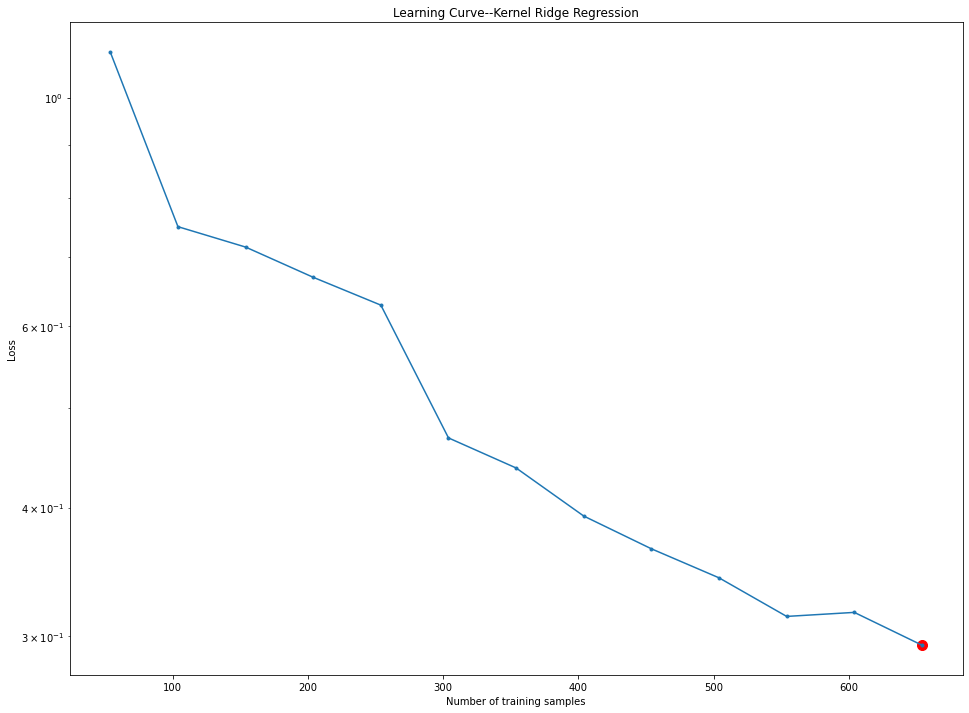

In [40]:
plt.figure(figsize=(16, 12))
plt.plot(numbers_train,losses_krr,'.-')
plt.scatter(optimal_n_train_krr, min_loss_krr, s = 100,marker='o', color='r')
plt.xlabel('Number of training samples')
plt.yscale('log')
plt.ylabel('Loss')
#plt.legend()
plt.title('Learning Curve--'+'Kernel Ridge Regression')
plt.show()

### Summary

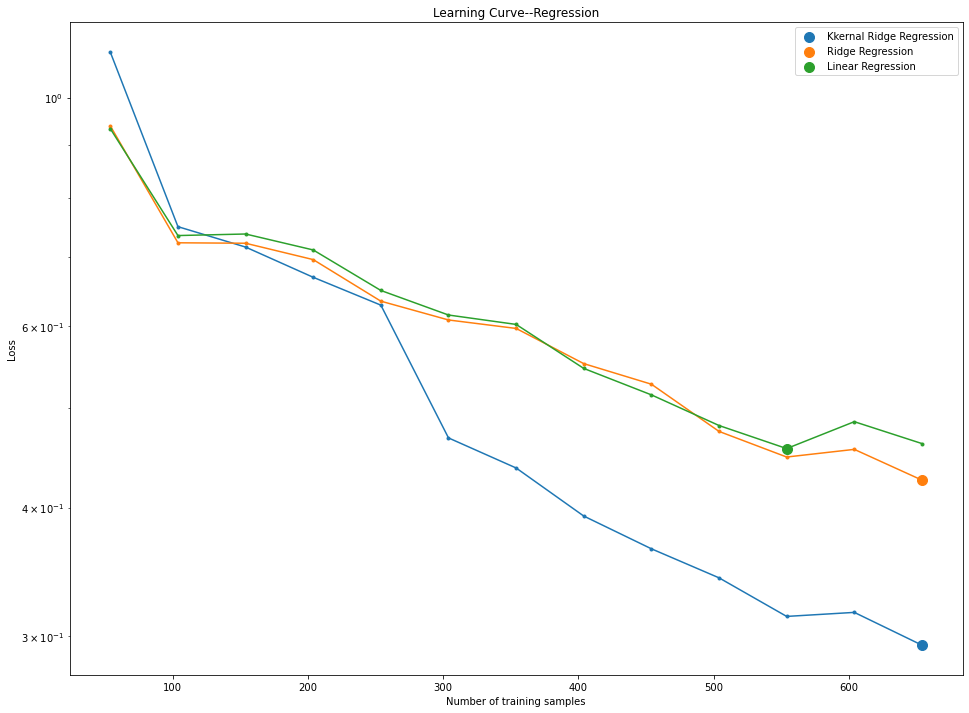

In [41]:
plt.figure(figsize=(16, 12))
plt.plot(numbers_train,losses_krr,'.-')
plt.scatter(optimal_n_train_krr, min_loss_krr, s = 100,marker='o',label='Kkernal Ridge Regression')
plt.plot(numbers_train,losses_rr,'.-')
plt.scatter(optimal_n_train_rr, min_loss_rr, s = 100,marker='o',label='Ridge Regression')
plt.plot(numbers_train,losses_lr,'.-')
plt.scatter(optimal_n_train_lr, min_loss_lr, s = 100,marker='o',label='Linear Regression')

plt.xlabel('Number of training samples')
plt.yscale('log')
plt.ylabel('Loss')
plt.legend()
plt.title('Learning Curve--'+'Regression')
plt.show()